## Question 1

In [1]:
def countOccurance(mainArray, subArray):
  # Define the window size
  w = len(subArray)
  # Number of occurance
  count = 0
  
  # sliding window across the main array
  for i in range(len(mainArray)-len(subArray)+1):
    # Take elements from mainArray
    search = []
    for j in range(w):
      search.append(mainArray[i+j])
    # check if two array is equal
    if isPattern(search, subArray):
      count += 1    
  return count

In [2]:
def isPattern(search, subArray):
    isValid=0
    if len(search) != len(subArray):
      return False
    for i in range (len(subArray)):
      if search[i]==subArray[i]:
        isValid += 1
    if isValid==len(subArray):
      return True
    return False

In [3]:
A = [1,2,30,5,3,5, 70, 9, 1, 2, 30, 44, 25,56,56, 6, 1, 2, 30, 50, 43, 654, 1,2,30]
B = [1, 2, 30]

print("1-b) Occurance of array B in array A is " + str(countOccurance(A, B)))

1-b) Occurance of array B in array A is 4


In [4]:
import numpy as np

# Convert int array to string
def listToString(s):
    # mapping int to string
    s=map(str, s)
    # return string 
    return (', '.join(s))

# convert B to string
arr_B = listToString(B)
  
# Counting sequence
output = repr(A).count(arr_B)
  
# view output
print("1-c) Occurance of array B in array A is " + str(output))

1-c) Occurance of array B in array A is 4


## Question 2

In [5]:
# 2-a)  if we want to use only one function from that library we can import only targeted function. 
#     We need to define variable X
from math import ceil
x=4.3
x = ceil(x)

In [6]:
# 2-b)  we can directly send each item to function.
#     we need to define function
def process_fruit(item):
  print(item)
list_of_fruits = ["apple", "pear", "orange"]
for i in range(len(list_of_fruits)):
  process_fruit(list_of_fruits[i])

apple
pear
orange


In [7]:
# 2-c) an object takes two variable to initiate ("height" and "weight"). Can give area with area() function 
class Rectangle:
  def __init__(self, height, width):
    self.height = height
    self.width = width
  def area(self):
    return self.height * self.width

## Question 3

In [8]:
import numpy as np
from PIL import Image
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,AveragePooling2D, Dropout
from keras import layers, optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
dataset_length=1000
test_dataset_length=300

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [9]:
def genImage():
    array = np.random.randint(low=0, high=255,size=(5,5,1),dtype=np.uint8)
    return array

In [10]:
# Creating random labels
labels = np.random.randint(2, size = (dataset_length,1),dtype=np.uint8)
labels=np.array(labels)
images=[]

# Creating random images
for i in range(dataset_length):
  images.append(genImage())
images=np.array(images)

# shuffling arrays
np.random.shuffle(labels)
np.random.shuffle(images)

In [11]:
# creating %30 test dataset
test_label,train_label = labels[:test_dataset_length], labels[test_dataset_length:]
test_image,train_image = images[:test_dataset_length], images[test_dataset_length:]

In [12]:
#Get the shape of datasets
print('train_image shape:', train_image.shape)
print('train_label shape:', train_label.shape)
print('test_image shape:', test_image.shape)
print('test_label shape:', test_label.shape)

train_image shape: (700, 5, 5, 1)
train_label shape: (700, 1)
test_image shape: (300, 5, 5, 1)
test_label shape: (300, 1)


In [13]:
# creating one hot encoding for 2 class
train_label_one_hot = to_categorical(train_label)
test_label_one_hot = to_categorical(test_label)

In [14]:
# normalizing pixels
train_image  = train_image / 255
test_image  = test_image / 255

In [15]:
# creating model
model = Sequential()
model.add(Conv2D(10, kernel_size=(2,2),  activation='relu',padding='same', input_shape=(5,5,1)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(20, kernel_size=(2,2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 5, 10)          50        
                                                                 
 average_pooling2d (AverageP  (None, 2, 2, 10)         0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 20)          820       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 20)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 100)               2

In [16]:
#compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# categorical_crossentropy is used as we have two output labels due to multi-class classification.
# adam optimizer is used as it is suggested as the default optimization method for deep learning applications.
# softmax is used for the last dense layer as it is used for multi-class classification problems 

In [17]:
# train the model
hist = model.fit(train_image, train_label_one_hot , 
           batch_size=32, epochs=20, validation_split=0.2 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20
18/18 [==============================] - 13s 35ms/step - loss: 0.6925 - accuracy: 0.4911 - val_loss: 0.6946 - val_accuracy: 0.4929
Epoch 2/20
18/18 [==============================] - 0s 24ms/step - loss: 0.6920 - accuracy: 0.5429 - val_loss: 0.6980 - val_accuracy: 0.4929
Epoch 3/20
18/18 [==============================] - 0s 24ms/step - loss: 0.6906 - accuracy: 0.5357 - val_loss: 0.6981 - val_accuracy: 0.4929
Epoch 4/20
18/18 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.5411 - val_loss: 0.6977 - val_accuracy: 0.4929
Epoch 5/20
18/18 [==============================] - 0s 24ms/step - loss: 0.6914 - accuracy: 0.5411 - val_loss: 0.6969 - val_accuracy: 0.4929
Epoch 6/20
18/18 [==============================] - 0s 23ms/step - loss: 0.6922 - accuracy: 0.5286 - val_loss: 0.6979 - val_accuracy: 0.4929
Epoch 7/20
18/18 [==============================] - 0s 24ms/step - loss: 0.6926 - accuracy: 0.5321 - val_loss: 0.6960 - val_accuracy: 0.4929
Epoch 8/20
1

In [18]:
# Evaluate the model
model.evaluate(test_image, test_label_one_hot)[1]

10/10 [==============================] - 0s 11ms/step - loss: 0.6973 - accuracy: 0.4933


0.4933333396911621

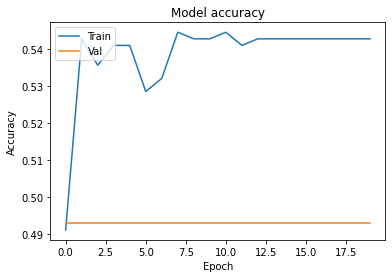

In [19]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

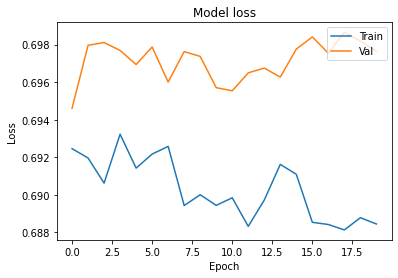

In [20]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()